<a href="https://colab.research.google.com/github/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/blob/main/Telecom_x_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

url = 'https://raw.githubusercontent.com/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/main/telecom_data_com_contas_diarias.csv'

df = pd.read_csv(url)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,Faixa_Gasto_Diario
0,0002-orfbo,0.0,female,0,yes,yes,9,yes,no,dsl,...,yes,yes,no,one year,yes,mcheck,65.6,593.30,2.186667,Médio
1,0003-mknfe,0.0,male,0,no,no,9,yes,yes,dsl,...,no,no,yes,month-to-month,no,mcheck,59.9,542.40,1.996667,Baixo
2,0004-tlhlj,1.0,male,0,no,no,4,yes,no,fiber,...,no,no,no,month-to-month,yes,echeck,73.9,280.85,2.463333,Médio
3,0011-igkff,1.0,male,1,yes,no,13,yes,no,fiber,...,no,yes,yes,month-to-month,yes,echeck,98.0,1237.85,3.266667,Alto
4,0013-exchz,1.0,female,1,yes,no,3,yes,no,fiber,...,yes,yes,no,month-to-month,yes,mcheck,83.9,267.40,2.796667,Médio


In [26]:
import pandas as pd

url = 'https://raw.githubusercontent.com/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/main/telecom_data_com_contas_diarias.csv'
df = pd.read_csv(url)

# Primeiro, vamos verificar todas as colunas para identificar possíveis IDs
print("Todas as colunas do DataFrame:")
print(df.columns.tolist())
print("\n")

# Vamos examinar mais detalhadamente as colunas que parecem ser identificadores
colunas_suspeitas = ['customerID', 'id', 'ID', 'codigo', 'cod', 'numero', 'chave', 'key']
colunas_identificadores = []

for coluna in df.columns:
    for suspeita in colunas_suspeitas:
        if suspeita.lower() in coluna.lower():
            colunas_identificadores.append(coluna)
            break

print("Colunas identificadas como possíveis IDs:")
print(colunas_identificadores)
print("\n")

# Verificar a cardinalidade dessas colunas
print("Cardinalidade das colunas suspeitas:")
for coluna in colunas_identificadores:
    if coluna in df.columns:
        print(f"{coluna}: {df[coluna].nunique()} valores únicos (total: {len(df)})")
print("\n")

# Remover colunas que são claramente identificadores únicos
# Vamos estabelecer um limite: se uma coluna tem mais de 90% de valores únicos, provavelmente é um ID
colunas_para_remover = []
for coluna in df.columns:
    if df[coluna].nunique() / len(df) > 0.9:
        colunas_para_remover.append(coluna)
        print(f"Removendo {coluna} - {df[coluna].nunique()} valores únicos")

# Também remover colunas específicas que sabemos serem IDs
colunas_ids_especificas = ['customerID']  # adicione outras se necessário
for coluna in colunas_ids_especificas:
    if coluna in df.columns and coluna not in colunas_para_remover:
        colunas_para_remover.append(coluna)
        print(f"Removendo {coluna} - identificada explicitamente como ID")

# Remover as colunas
df_limpo = df.drop(columns=colunas_para_remover)

print(f"\nShape original: {df.shape}")
print(f"Shape após remoção: {df_limpo.shape}")
print(f"Colunas removidas: {colunas_para_remover}")
print(f"\nColunas restantes: {df_limpo.columns.tolist()}")

Todas as colunas do DataFrame:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'Faixa_Gasto_Diario']


Colunas identificadas como possíveis IDs:
['customerID']


Cardinalidade das colunas suspeitas:
customerID: 7267 valores únicos (total: 7267)


Removendo customerID - 7267 valores únicos

Shape original: (7267, 23)
Shape após remoção: (7267, 22)
Colunas removidas: ['customerID']

Colunas restantes: ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'p

In [27]:
df_limpo.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,Faixa_Gasto_Diario
0,0.0,female,0,yes,yes,9,yes,no,dsl,no,...,yes,yes,no,one year,yes,mcheck,65.6,593.30,2.186667,Médio
1,0.0,male,0,no,no,9,yes,yes,dsl,no,...,no,no,yes,month-to-month,no,mcheck,59.9,542.40,1.996667,Baixo
2,1.0,male,0,no,no,4,yes,no,fiber,no,...,no,no,no,month-to-month,yes,echeck,73.9,280.85,2.463333,Médio
3,1.0,male,1,yes,no,13,yes,no,fiber,no,...,no,yes,yes,month-to-month,yes,echeck,98.0,1237.85,3.266667,Alto
4,1.0,female,1,yes,no,3,yes,no,fiber,no,...,yes,yes,no,month-to-month,yes,mcheck,83.9,267.40,2.796667,Médio


In [28]:
import pandas as pd

url = 'https://raw.githubusercontent.com/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/main/telecom_data_com_contas_diarias.csv'
df = pd.read_csv(url)

# Remover colunas identificadoras primeiro (como fizemos anteriormente)
# Vamos assumir que já identificamos e removemos as colunas problemáticas
# Para este exemplo, vou focar apenas nas transformações categóricas

# Identificar colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("Colunas categóricas identificadas:")
print(colunas_categoricas)
print(f"Total: {len(colunas_categoricas)} colunas categóricas")
print("\n")

# Verificar a cardinalidade de cada coluna categórica (número de valores únicos)
print("Cardinalidade das colunas categóricas:")
for coluna in colunas_categoricas:
    print(f"{coluna}: {df[coluna].nunique()} valores únicos")
print("\n")

# Para colunas com baixa cardinalidade (até ~10 categorias), aplicar one-hot encoding
# Para colunas com alta cardinalidade, considerar outras abordagens como target encoding
colunas_baixa_cardinalidade = []
colunas_alta_cardinalidade = []

for coluna in colunas_categoricas:
    if df[coluna].nunique() <= 10:
        colunas_baixa_cardinalidade.append(coluna)
    else:
        colunas_alta_cardinalidade.append(coluna)

print("Colunas com baixa cardinalidade (one-hot encoding):")
print(colunas_baixa_cardinalidade)
print("\n")

print("Colunas com alta cardinalidade (precisam de abordagem alternativa):")
print(colunas_alta_cardinalidade)
print("\n")

# Aplicar one-hot encoding nas colunas de baixa cardinalidade
df_encoded = pd.get_dummies(df, columns=colunas_baixa_cardinalidade, drop_first=True)

# Para colunas de alta cardinalidade, podemos considerar:
# 1. Target encoding (se tivermos uma variável target definida)
# 2. Frequency encoding
# 3. Remover se não forem importantes

# Vamos fazer frequency encoding para colunas de alta cardinalidade
for coluna in colunas_alta_cardinalidade:
    # Calcular frequências
    freq_encoding = df[coluna].value_counts(normalize=True)
    # Aplicar encoding
    df_encoded[coluna + '_freq'] = df[coluna].map(freq_encoding)
    # Remover a coluna original
    df_encoded.drop(columns=[coluna], inplace=True)

print("Transformação concluída!")
print(f"Shape original: {df.shape}")
print(f"Shape após encoding: {df_encoded.shape}")
print(f"Número de colunas aumentou de {len(df.columns)} para {len(df_encoded.columns)}")
print("\nPrimeiras linhas do DataFrame transformado:")
print(df_encoded.head())

Colunas categóricas identificadas:
['customerID', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Faixa_Gasto_Diario']
Total: 17 colunas categóricas


Cardinalidade das colunas categóricas:
customerID: 7267 valores únicos
customer.gender: 2 valores únicos
customer.Partner: 2 valores únicos
customer.Dependents: 2 valores únicos
phone.PhoneService: 2 valores únicos
phone.MultipleLines: 3 valores únicos
internet.InternetService: 3 valores únicos
internet.OnlineSecurity: 3 valores únicos
internet.OnlineBackup: 3 valores únicos
internet.DeviceProtection: 3 valores únicos
internet.TechSupport: 3 valores únicos
internet.StreamingTV: 3 valores únicos
internet.StreamingMovies: 3 val

Colunas disponíveis:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'Faixa_Gasto_Diario']


Coluna de evasão identificada: Churn

Valores únicos na coluna 'Churn':
Churn
0.0    5398
1.0    1869
Name: count, dtype: int64



=== ANÁLISE DE EVASÃO ===
Total de clientes: 7267
Evasores: 1869 (25.72%)
Não evasores: 5398 (74.28%)
Razão de desequilíbrio: 2.89:1
AVISO: Desequilíbrio moderado entre classes detectado.
Pode ser benéfico aplicar técnicas de balanceamento.


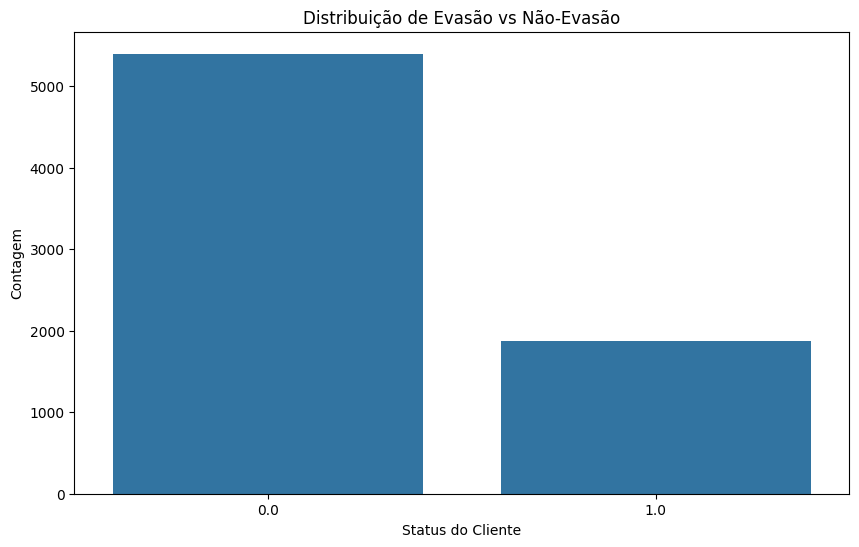

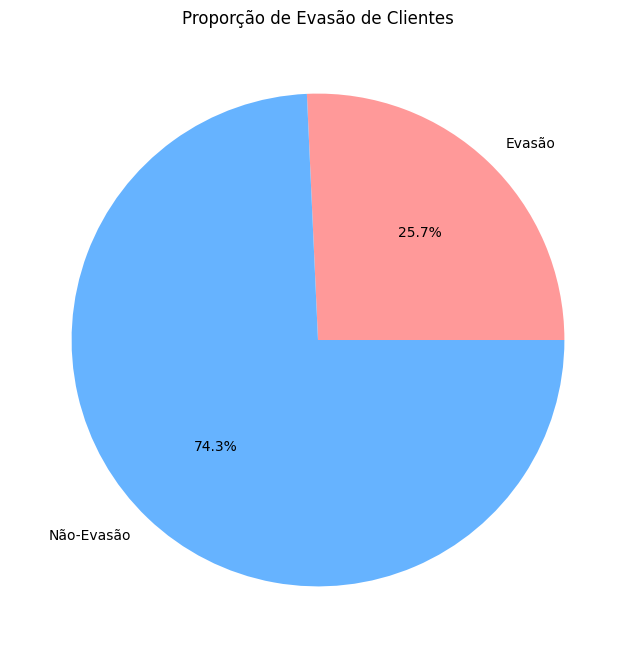

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/main/telecom_data_com_contas_diarias.csv'
df = pd.read_csv(url)

# Primeiro, precisamos identificar qual coluna representa a evasão (churn)
# Vamos procurar por colunas que possam indicar o status do cliente
print("Colunas disponíveis:")
print(df.columns.tolist())
print("\n")

# Verificar se há uma coluna específica para churn
# Nomes comuns: 'Churn', 'churn', 'Evasão', 'Status'
churn_columns = [col for col in df.columns if 'churn' in col.lower() or 'evas' in col.lower() or 'status' in col.lower()]

if churn_columns:
    churn_col = churn_columns[0]
    print(f"Coluna de evasão identificada: {churn_col}")
else:
    # Se não encontrar uma coluna específica, vamos verificar outras possibilidades
    print("Não foi encontrada uma coluna explícita de evasão.")
    print("Vamos verificar as primeiras linhas para identificar possíveis colunas-alvo:")
    print(df.head())
    # Neste caso, você precisaria especificar manualmente qual é a coluna de evasão
    churn_col = input("Por favor, digite o nome da coluna que representa a evasão: ")

# Verificar os valores únicos na coluna de evasão
print(f"\nValores únicos na coluna '{churn_col}':")
print(df[churn_col].value_counts())
print("\n")

# Calcular a proporção de evasão
if churn_col in df.columns:
    total_clientes = len(df)
    contagem_evasao = df[churn_col].value_counts()

    # Normalizar os valores se necessário (alguns datasets usam Yes/No, 0/1, etc.)
    # Vamos tentar identificar o formato
    valores_unicos = df[churn_col].unique()

    if set(valores_unicos).issubset({0, 1, '0', '1', 'Yes', 'No', 'Sim', 'Não'}):
        # Se for binário, vamos mapear para 0 e 1
        mapeamento = {
            'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0,
            'yes': 1, 'no': 0, 'sim': 1, 'não': 0,
            'True': 1, 'False': 0, 'TRUE': 1, 'FALSE': 0,
            True: 1, False: 0
        }

        df['churn_numerico'] = df[churn_col].map(mapeamento).fillna(df[churn_col]).astype(int)
        evasores = df['churn_numerico'].sum()
        nao_evasores = total_clientes - evasores
    else:
        # Se não for binário, assumimos que a maioria representa não-evasão
        # Neste caso, precisamos saber qual valor representa evasão
        print("A coluna de evasão não parece ser binária padrão.")
        print("Valores únicos:", valores_unicos)
        valor_evasao = input("Qual valor representa evasão? ")

        evasores = (df[churn_col] == valor_evasao).sum()
        nao_evasores = total_clientes - evasores

    # Calcular proporções
    proporcao_evasao = evasores / total_clientes
    proporcao_nao_evasao = nao_evasores / total_clientes

    print(f"\n=== ANÁLISE DE EVASÃO ===")
    print(f"Total de clientes: {total_clientes}")
    print(f"Evasores: {evasores} ({proporcao_evasao:.2%})")
    print(f"Não evasores: {nao_evasores} ({proporcao_nao_evasao:.2%})")

    # Avaliar desequilíbrio
    razao_desequilibrio = max(proporcao_evasao, proporcao_nao_evasao) / min(proporcao_evasao, proporcao_nao_evasao)
    print(f"Razão de desequilíbrio: {razao_desequilibrio:.2f}:1")

    if razao_desequilibrio > 4:
        print("ALERTA: Forte desequilíbrio entre classes detectado!")
        print("Isso pode impactar significativamente o desempenho dos modelos preditivos.")
        print("Recomenda-se técnicas como oversampling, undersampling ou pesos de classe.")
    elif razao_desequilibrio > 2:
        print("AVISO: Desequilíbrio moderado entre classes detectado.")
        print("Pode ser benéfico aplicar técnicas de balanceamento.")
    else:
        print("As classes estão relativamente balanceadas.")

    # Visualizar a distribuição
    plt.figure(figsize=(10, 6))
    sns.countplot(x=churn_col, data=df)
    plt.title('Distribuição de Evasão vs Não-Evasão')
    plt.xlabel('Status do Cliente')
    plt.ylabel('Contagem')
    plt.show()

    # Gráfico de pizza para visualizar as proporções
    plt.figure(figsize=(8, 8))
    plt.pie([evasores, nao_evasores],
            labels=['Evasão', 'Não-Evasão'],
            autopct='%1.1f%%',
            colors=['#ff9999', '#66b3ff'])
    plt.title('Proporção de Evasão de Clientes')
    plt.show()

else:
    print(f"A coluna '{churn_col}' não foi encontrada no DataFrame.")

Variáveis com maior correlação com a evasão:
Churn                      1.000000
churn_numeric              1.000000
account.Charges.Monthly    0.189866
Contas_Diarias             0.189866
customer.SeniorCitizen     0.146733
account.Charges.Total     -0.194440
customer.tenure           -0.344079
Name: churn_numeric, dtype: float64




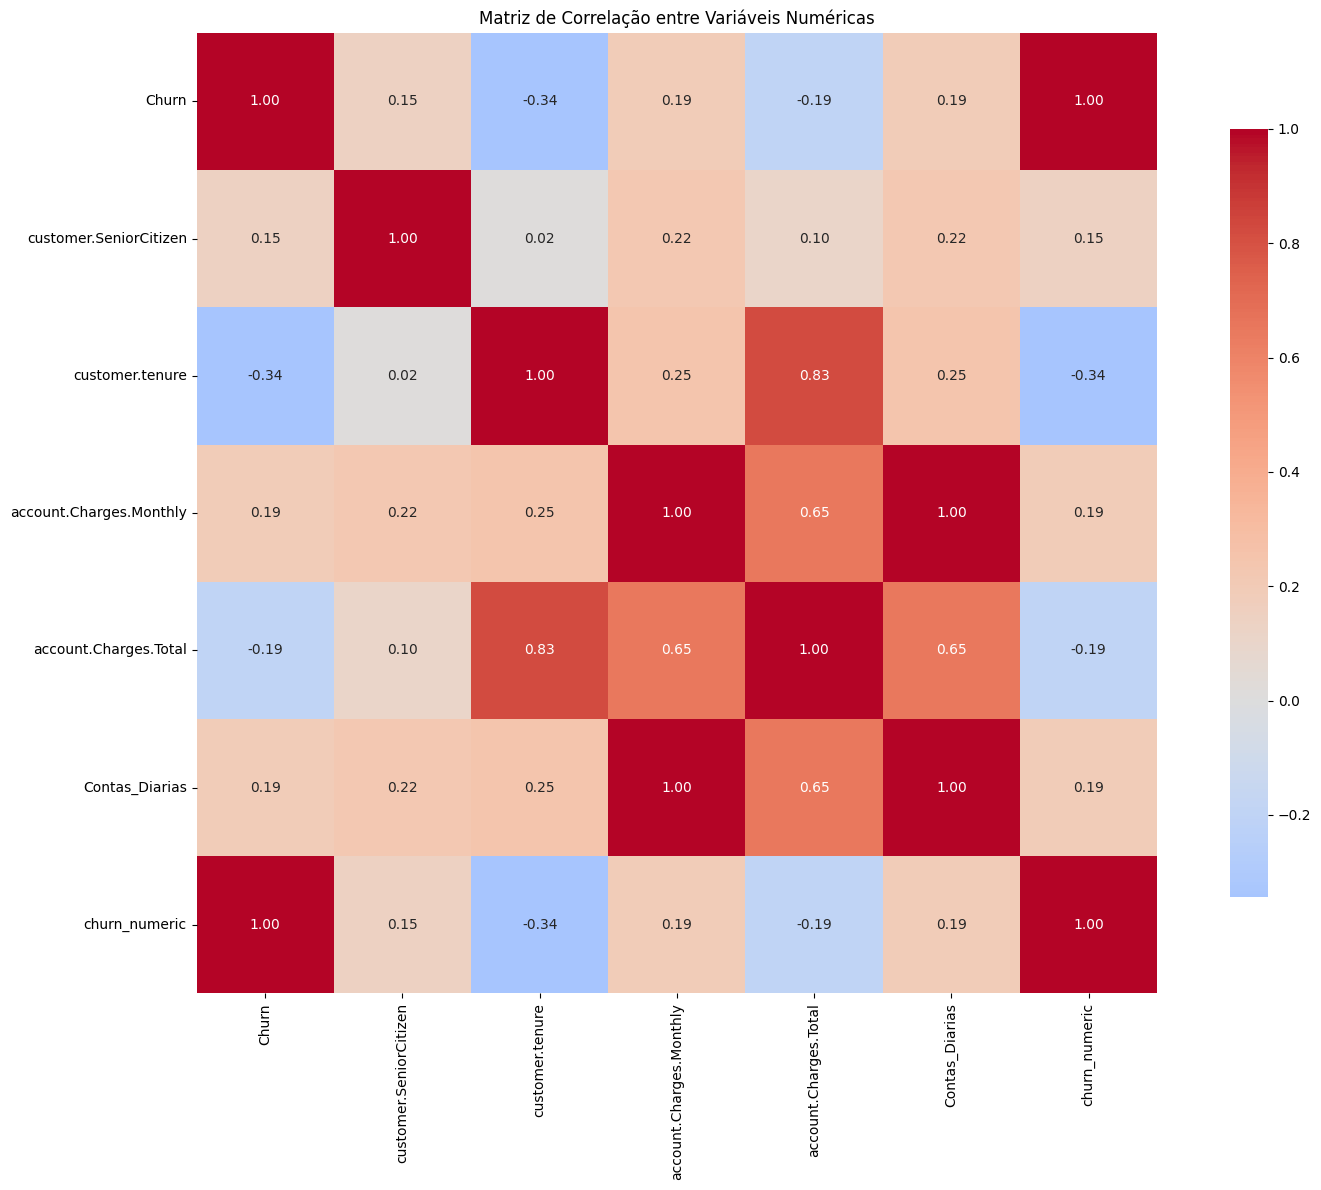

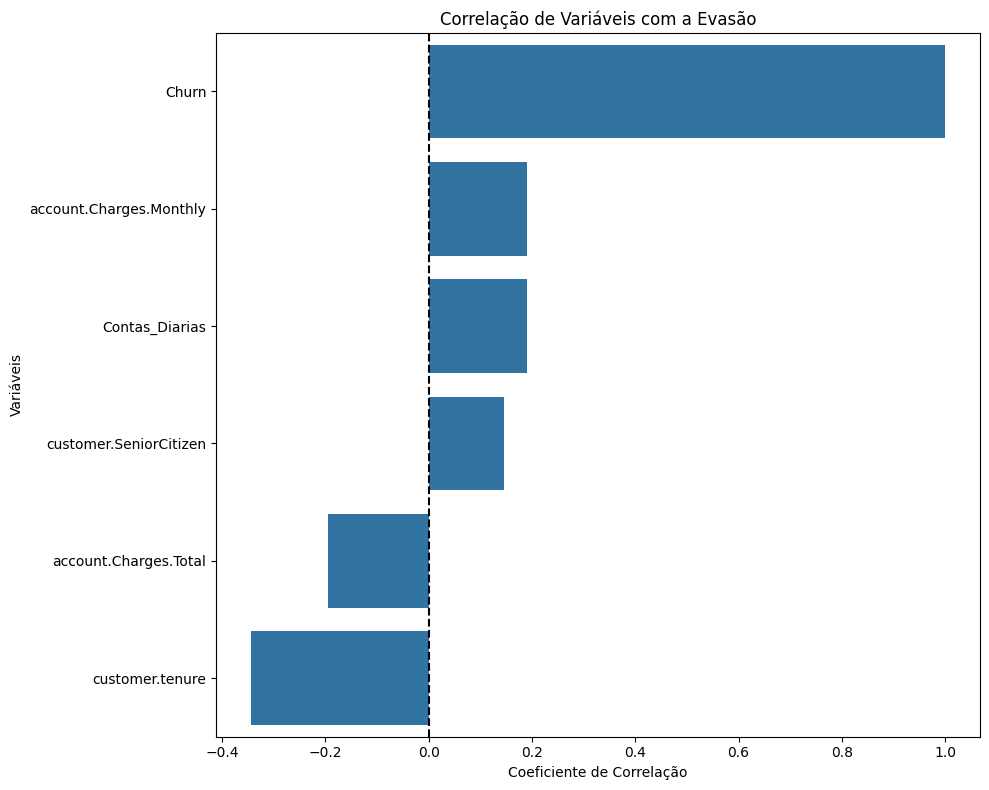

Variáveis com maior correlação POSITIVA com evasão (aumentam a probabilidade de evasão):
Churn                      1.000000
account.Charges.Monthly    0.189866
Contas_Diarias             0.189866
customer.SeniorCitizen     0.146733
Name: churn_numeric, dtype: float64


Variáveis com maior correlação NEGATIVA com evasão (reduzem a probabilidade de evasão):
customer.tenure         -0.344079
account.Charges.Total   -0.194440
Name: churn_numeric, dtype: float64


Variáveis com correlação estatisticamente significativa (p < 0.05):
Churn: r=1.000, p=0.0000
customer.tenure: r=-0.344, p=0.0000
account.Charges.Total: r=-0.194, p=0.0000
Contas_Diarias: r=0.190, p=0.0000
account.Charges.Monthly: r=0.190, p=0.0000
customer.SeniorCitizen: r=0.147, p=0.0000


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
url = 'https://raw.githubusercontent.com/EzequielFarias144/Challenge-Alura-telecom-x-parte-2/main/telecom_data_com_contas_diarias.csv'
df = pd.read_csv(url)

# Primeiro, vamos garantir que a variável de evasão esteja em formato numérico
# Vamos assumir que a coluna se chama 'Churn' (ajuste conforme necessário)

# Identificar a coluna de churn
churn_col = None
for col in df.columns:
    if 'churn' in col.lower():
        churn_col = col
        break

if churn_col is None:
    print("Não foi possível encontrar a coluna de evasão. Verifique o nome da coluna.")
    # Listar colunas para ajudar na identificação
    print("Colunas disponíveis:", df.columns.tolist())
    churn_col = input("Por favor, digite o nome exato da coluna de evasão: ")

# Converter a coluna de churn para numérico (0 e 1)
if df[churn_col].dtype == 'object':
    le = LabelEncoder()
    df['churn_numeric'] = le.fit_transform(df[churn_col])
    # Verificar qual valor corresponde à evasão
    print(f"Valores codificados: {dict(zip(le.classes_, le.transform(le.classes_)))}")
else:
    df['churn_numeric'] = df[churn_col]

# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calcular a matriz de correlação
correlation_matrix = df[numeric_cols].corr()

# Focar nas correlações com a variável de evasão
churn_correlations = correlation_matrix['churn_numeric'].sort_values(ascending=False)

print("Variáveis com maior correlação com a evasão:")
print(churn_correlations)
print("\n")

# Visualizar a matriz de correlação completa
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

# Visualizar apenas as correlações com a evasão
plt.figure(figsize=(10, 8))
churn_correlations_without_self = churn_correlations.drop('churn_numeric')
sns.barplot(x=churn_correlations_without_self.values, y=churn_correlations_without_self.index)
plt.title('Correlação de Variáveis com a Evasão')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Identificar as variáveis com maior correlação (positiva e negativa)
print("Variáveis com maior correlação POSITIVA com evasão (aumentam a probabilidade de evasão):")
top_positive = churn_correlations_without_self[churn_correlations_without_self > 0].sort_values(ascending=False).head(10)
print(top_positive)
print("\n")

print("Variáveis com maior correlação NEGATIVA com evasão (reduzem a probabilidade de evasão):")
top_negative = churn_correlations_without_self[churn_correlations_without_self < 0].sort_values(ascending=True).head(10)
print(top_negative)
print("\n")

# Análise de significância estatística (opcional)
print("Variáveis com correlação estatisticamente significativa (p < 0.05):")
from scipy.stats import pearsonr

significant_vars = []
for col in numeric_cols:
    if col != 'churn_numeric':
        # Remover valores NaN para o teste
        valid_data = df[[col, 'churn_numeric']].dropna()
        if len(valid_data) > 2:
            corr, p_value = pearsonr(valid_data[col], valid_data['churn_numeric'])
            if p_value < 0.05:
                significant_vars.append((col, corr, p_value))

# Ordenar por valor absoluto da correlação
significant_vars.sort(key=lambda x: abs(x[1]), reverse=True)
for var, corr, p_val in significant_vars:
    print(f"{var}: r={corr:.3f}, p={p_val:.4f}")